In [6]:
# NOTEBOOK'U DRIVE'A MONTE ETMEK
# aşağıdaki kodları çalıştıracağız ve karşımıza bir link çıkar ve enter your authorization der. 
# linke tıkla-hesabı seç-izin ver- kodu enter authorization a gir 
# izin işlemi bitti artık notebook dirve a monte oldu
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#Veri setinin notebook'a aktarmak için
import pandas as pd
#sonrasında ise titanic=pd.read_csv formulunun içine directory'yi yaz. directory yukarıda saving to kısmında adres görünüyor zaten
data=pd.read_csv('/content/drive/My Drive/PYTHON/DENEMELER/SISE.IS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-05,8.15,8.21,8.09,8.10,7.943051,68594304
1,2021-10-06,8.08,8.08,7.89,7.91,7.756732,95755951
2,2021-10-07,7.97,8.05,7.96,8.02,7.864601,61522468
3,2021-10-08,8.02,8.08,8.00,8.02,7.864601,57804095
4,2021-10-11,8.03,8.14,8.03,8.12,7.962663,68168905


In [23]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping 

from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

In [10]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import datetime as dt

Text(0, 0.5, 'tl')

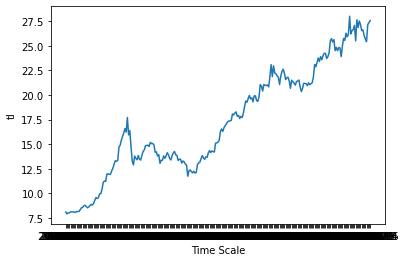

In [24]:
x = data['Date']
y = data['Close']
plt.plot(x,y)
plt.xlabel('Time Scale')
plt.ylabel('tl')

In [12]:
from prophet import Prophet

In [25]:
dfdata = data[["Date","Close"]]
dfdata.rename(columns={"Date":"ds"}, inplace=True)
dfdata.rename(columns={"Close":"y"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
dfdata

,ds,y
0,2021-10-05,8.100000
1,2021-10-06,7.910000
2,2021-10-07,8.020000
3,2021-10-08,8.020000
4,2021-10-11,8.120000
5,2021-10-12,8.120000
6,2021-10-13,8.130000
7,2021-10-14,8.110000
8,2021-10-15,8.060000
9,2021-10-18,8.160000


In [27]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-3zds37o4/fbprophet_9e27357f36ab4eadbca011bdf98f2b6c/setup.py'"'"'; __file__='"'"'/tmp/pip-install-3zds37o4/fbprophet_9e27357f36ab4eadbca011bdf98f2b6c/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-8vrbz0z2/install-record.txt --single-version-externally-managed --compile --install-hea

In [28]:
from prophet import Prophet
m = Prophet()
m.fit(dfdata)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
338,2022-12-30
339,2022-12-31
340,2023-01-01
341,2023-01-02
342,2023-01-03


In [30]:
forecast = m.predict(future)
dfforecast= forecast[["ds", "yhat","yhat_lower","yhat_upper"]]
pd.set_option('display.max_rows', dfforecast.shape[0]+1)
dfforecast

,ds,yhat,yhat_lower,yhat_upper
0,2021-10-05,6.810268,5.686617,7.912465
1,2021-10-06,6.827597,5.767547,7.937810
2,2021-10-07,6.930922,5.900373,8.025647
3,2021-10-08,7.058156,5.908804,8.173743
4,2021-10-11,7.355087,6.271933,8.438974
5,2021-10-12,7.560030,6.504268,8.672849
6,2021-10-13,7.577359,6.368981,8.618700
7,2021-10-14,7.680684,6.564045,8.753023
8,2021-10-15,7.807918,6.761193,8.872717
9,2021-10-18,8.104848,7.004859,9.121458


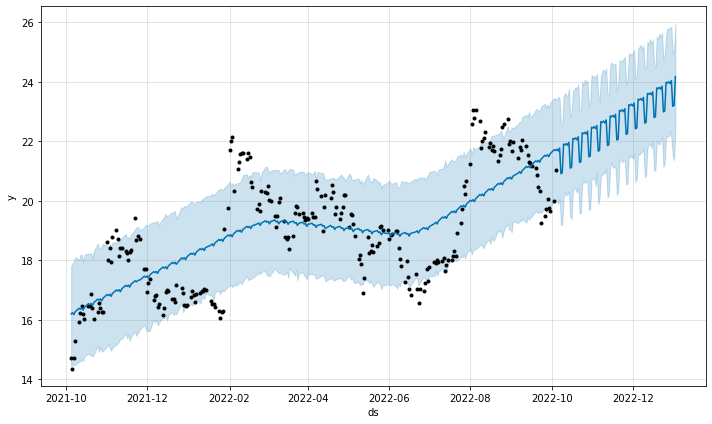

In [20]:
fig1 = m.plot(forecast)

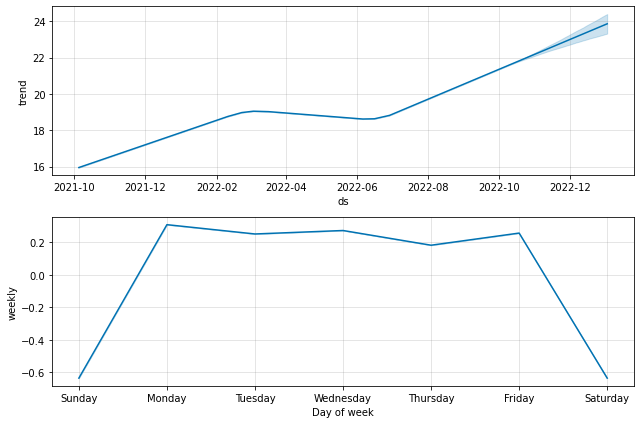

In [21]:
fig2 = m.plot_components(forecast)